<a href="https://colab.research.google.com/github/AriaC23/Business-_opinion/blob/main/Copy_of_business_opinion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Loading

In [1]:
from google.colab import files
uploaded = files.upload() # upload kaggle.json

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download aashita/nyt-comments -f CommentsMarch2018.csv -p /content/

 90% 49.0M/54.3M [00:00<00:00, 64.3MB/s]
100% 54.3M/54.3M [00:00<00:00, 61.8MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile("CommentsMarch2018.csv.zip", 'r') as zip:
  zip.extractall()

In [ ]:
import pandas as pd
from collections import Counter, defaultdict

In [ ]:
data = pd.read_csv('/content/CommentsMarch2018.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14,15,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1520043821,5a974697410cf7000162e8a4,1207,If the choice is between mining for bitcoin - ...,26188943.0,26188943.0,<br/>,comment,1520029445,1.0,...,approved,1,0,1520043821,Steve,46903103.0,Florida,NaN,NaN,News
1,1520043790,5a974697410cf7000162e8a4,1207,"<br/>To me, Bitcoin (et al) appears to be an e...",26189292.0,26189292.0,<br/>,comment,1520031265,1.0,...,approved,1,0,1520043790,MyOpinion,82778.0,NYC,NaN,NaN,News
2,1520043789,5a974697410cf7000162e8a4,1207,Bitcoin is a pyramid scheme backed by nothing ...,26189645.0,26189645.0,<br/>,comment,1520033172,1.0,...,approved,1,0,1520043789,Bert Gold,3013548.0,"Frederick, Maryland",NaN,NaN,News
3,1520043788,5a974697410cf7000162e8a4,1207,What does it cost in energy to dig up and refi...,26189102.0,26189102.0,<br/>,comment,1520030291,1.0,...,approved,1,0,1520043788,James Demers,70245222.0,Brooklyn,NaN,NaN,News
4,1520043787,5a974697410cf7000162e8a4,1207,You forgot to mention stock buybacks.,26189683.0,26189683.0,<br/>,comment,1520033404,1.0,...,approved,1,0,1520043787,Bill,66424344.0,California,NaN,NaN,News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246910,1522592385,5abfd3ae47de81a90121a8bf,1218,"And so it goes, ""power concedes nothing"".",26559272.0,26559272.0,<br/>,userReply,1522573366,3.0,...,approved,1,0,1522592385,fdc,67922378.0,USA,NaN,NaN,Op-Ed
246911,1522597975,5abfd3ae47de81a90121a8bf,1218,"The mere ""kvetches"" you malign need to be told...",26560717.0,26560717.0,<br/>,userReply,1522593487,3.0,...,approved,1,0,1522597975,The way it is,59299382.0,NC,NaN,NaN,Op-Ed
246912,1522598023,5abfd3ae47de81a90121a8bf,1218,"What you say sounds good, and intelligent. But...",26560789.0,26560789.0,<br/>,userReply,1522594187,3.0,...,approved,1,0,1522598023,LFK,60787329.0,VA,NaN,NaN,Op-Ed
246913,1522634688,5ac0ea1647de81a90121abd6,1492,"Actually, the US is not in the top ten for mas...",26563371.0,26563371.0,<br/>,userReply,1522634660,3.0,...,approved,1,0,1522634688,KBronson,56503012.0,Louisiana,NaN,NaN,News


In [ ]:
data = data[['commentBody', 'newDesk', 'editorsSelection']]

In [ ]:
data

,commentBody,newDesk,editorsSelection
0,If the choice is between mining for bitcoin - ...,Business,0
1,"<br/>To me, Bitcoin (et al) appears to be an e...",Business,0
2,Bitcoin is a pyramid scheme backed by nothing ...,Business,0
3,What does it cost in energy to dig up and refi...,Business,0
4,You forgot to mention stock buybacks.,Business,0
...,...,...,...
246910,"And so it goes, ""power concedes nothing"".",OpEd,0
246911,"The mere ""kvetches"" you malign need to be told...",OpEd,0
246912,"What you say sounds good, and intelligent. But...",OpEd,0
246913,"Actually, the US is not in the top ten for mas...",Politics,0


In [ ]:
business = data.loc[data['newDesk']=='Business']

In [ ]:
business

,commentBody,newDesk,editorsSelection
0,If the choice is between mining for bitcoin - ...,Business,0
1,"<br/>To me, Bitcoin (et al) appears to be an e...",Business,0
2,Bitcoin is a pyramid scheme backed by nothing ...,Business,0
3,What does it cost in energy to dig up and refi...,Business,0
4,You forgot to mention stock buybacks.,Business,0
...,...,...,...
246678,Maybe you missed the fact that Chinatown was b...,Business,0
246679,I’m not rooting for anyone JP.<br/><br/>I just...,Business,0
246680,Then let’s just call it tone deaf. After a ye...,Business,0
246681,Since he's made similar comments on other occa...,Business,0


In [ ]:
Counter(business['editorsSelection'])

Counter({0: 20352, 1: 363})

# 2.Text Cleaning

In [ ]:
!pip install nltk
import nltk
nltk.download("all")
from nltk import sent_tokenize

In [ ]:
sentences = [] # each comment as a doc
for i in business["commentBody"]:
    s=sent_tokenize(i)
    sentences.append(s)
sentences[0]

['If the choice is between mining for bitcoin - which wastes hydroelectric power and takes up empty office space -- or mining for gold &amp; diamonds - which is hugely destructive to people and the environment in developing countries - I think we can live with bitcoin mining.']

In [ ]:
# tokenization
from nltk.tokenize import word_tokenize
token_list= []
for i in sentences: # i is comment level
    for j in i:
      tokens = word_tokenize(j)
      words = [word for word in tokens if word.isalpha()]
      words = [word.lower() for word in words]
      token_list.append(words)

In [ ]:
# lemmatization
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet 
lemmatizer = WordNetLemmatizer() 
def pos_tagger(nltk_tag): 
    if nltk_tag.startswith('J'): 
        return wordnet.ADJ 
    elif nltk_tag.startswith('V'): 
        return wordnet.VERB 
    elif nltk_tag.startswith('N'): 
        return wordnet.NOUN 
    elif nltk_tag.startswith('R'): 
        return wordnet.ADV 
    else:           
        return None
lemma_list = []
for i in token_list:
  pos_tagged = nltk.pos_tag(i)
  wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
  lemma = [] 
  for word, tag in wordnet_tagged:
    if word == "i":
      continue
    if tag is None: 
      # if there is no available tag, append the token as is 
      lemma.append(word) 
    else:         
      # else use the tag to lemmatize the token 
      lemma.append(lemmatizer.lemmatize(word, tag))
  lemma_list.append(lemma)

# 3.Aspect Extraction

In [ ]:
bi = []
for item in lemma_list:
  grams = [item[i:i+2] for i in range(len(item)-2+1)]
  bigrams = [' '.join(j) for j in grams]
  bi.append(bigrams)

In [ ]:
bi_v = [bigram for i in bi for bigram in i]
uni_v = [unigram for i in lemma_list for unigram in i]

In [ ]:
counter_uni = Counter(uni_v)
counter_bi = Counter(bi_v)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# filter before computing for less noise
for i in list(counter_bi.keys()):
  if i.split()[0] in stopwords.words('english'):
    if i.split()[1] in stopwords.words('english'):
      counter_bi.pop(i)

In [ ]:
for i in list(counter_bi.keys()):
  w,t = nltk.pos_tag(i.split())[0]
  w1,t1 = nltk.pos_tag(i.split())[1]
  if t[0] != "N":
    if t1[0] != "N":
      counter_bi.pop(i)

In [ ]:
import math
def pmi_index(bigram):
  a, b = bigram.split()
  pmi = math.log(counter_bi[bigram]/((counter_uni[a]-counter_bi[bigram])*(counter_uni[b]-counter_bi[bigram])/(len(uni_v)-counter_bi[a])))
  return pmi

In [ ]:
counter_b = counter_bi.most_common(100)

In [ ]:
bi_gram_list = [k for (k,v) in counter_b]

In [ ]:
frequency = [v for (k,v) in counter_b]

In [ ]:
pmi = [pmi_index(k) for (k,v) in counter_b]

In [ ]:
fre_df = pd.DataFrame({"bigram":bi_gram_list, "pmi":pmi, "frequency": frequency})

In [ ]:
fre_most = fre_df.sort_values(by="pmi", ascending=False).head(50)
fre_most

,bigram,pmi,frequency
74,cambridge analytica,12.390903,245
90,new york,11.636614,221
23,united state,8.833499,400
18,white house,8.717257,460
8,http http,8.503018,601
95,stormy daniel,8.173998,209
4,social medium,8.143883,852
94,no longer,7.753680,210
72,national security,7.703302,246
69,tax cut,7.393058,249


In [ ]:
select = fre_most.drop([8, 94, 50, 64, 37, 53, 7, 26, 86, 5, 68, 21, 70, 83, 11, 30, 40, 92, 62, 81, 33, 61, 96, 1, 35, 17, 57, 0, 25, 9, 87], axis = 0)
select_bi = select["bigram"]

In [ ]:
len(select_bi)

19

In [ ]:
bi_dict = defaultdict(list)
for bi in select_bi:
  f,s = bi.split()
  bi_dict[f].append(s)

In [ ]:
sent_c = []
for sent in lemma_list: 
  if len(sent) > 1:
    sent_list = []
    for i in range(len(sent)-1):
      if sent[i] in list(bi_dict.keys()):
        if sent[i+1] in bi_dict[sent[i]]:
          bi = sent[i] + " " + sent[i+1]
          sent_list.append(bi)
        else:
          if sent[i] not in stopwords.words('english'):
            sent_list.append(sent[i])  
      else:
        if sent[i] not in stopwords.words('english'):
          sent_list.append(sent[i]) 
    sent_c.append(sent_list)
  elif len(sent) == 1:
    if sent[0] not in stopwords.words('english'):
      sent_c.append(sent)
    else:
      sent_c.append([])
  else:
    sent_c.append([])

In [ ]:
sent1 = [] # comment level
for c in sentences:
  ll = []
  for s in c:
    tokens = word_tokenize(s)
    words = [word for word in tokens if word.isalpha()]
    words = [word.lower() for word in words]
    words = [word for word in words if word != 'i']
    ll.append(words)
  sent1.append(ll)

In [ ]:
num_com = len(sentences)

In [ ]:
com_sent = [] # basic list is sentence
count = 0
for i in range(num_com):
  end = count + len(sent1[i])
  cc = sent_c[count:end]
  com_sent.append(cc)
  count = end

In [ ]:
comment = [] # basic list is comment
for com in com_sent:
  c = []
  for sent in com:
    for wor in sent:
      c.append(wor)
  comment.append(c)

In [ ]:
noun = []
for com in comment:
  c = []
  for wor in com:
    if wor in select_bi:
      c.append(wor)
    else:
      w, t = nltk.pos_tag([wor])[0]
      if t[0] == "N":
        c.append(wor)
  noun.append(c)

In [ ]:
words = [wor for c in noun for wor in c]
v_n = [n for n,c in Counter(words).most_common(500)]

In [ ]:
!pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.DataFrame({"text":comment})
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x]))
vectorizer = TfidfVectorizer(vocabulary=v_n, ngram_range=(1,2))
TF_IDF = vectorizer.fit_transform(df['text'].values)
TF_IDF_array = TF_IDF.toarray()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=72dfba092927793048a3e9c21524c63626162c09649b272a444d690dedb4c895
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import numpy as np
sum = np.sum(TF_IDF_array,axis=0).tolist()

In [ ]:
rank = pd.DataFrame({"feature":vectorizer.get_feature_names(),"index": sum}).sort_values("index", ascending=False)
rank.head(50)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,index
0,trump,1086.997435
2,facebook,626.001501
1,people,588.400886
5,think,478.121676
4,time,466.440016
3,use,444.865095
16,world,438.489382
6,need,409.879351
28,medium,362.200350
8,want,357.476758


In [ ]:
aspects = rank.head(20)["feature"]
aspects

0         trump
2      facebook
1        people
5         think
4          time
3           use
16        world
6          need
28       medium
8          want
17        trade
7       company
10          way
9        tariff
15          car
37          war
11         year
14          pay
12      country
25    president
Name: feature, dtype: object

# 4.Aspect Categorization

In [ ]:
!pip install gensim
import gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
www = [word for item in sent_c for word in item]

In [ ]:
len(Counter(www).keys())

23355

In [ ]:
def skip(sent, n=3, s=2):
  k_grams = []
  for i in range(len(sent)):
    for z in range(s):
      seq = [sent[i]] + sent[i+z+1:i+z+n]
      if len(seq) == n and seq not in k_grams:
        k_grams.append(list(seq))
  return k_grams  

In [ ]:
sent_c1 = [sent for sent in sent_c if sent != []]

In [ ]:
sequences = []
for i in sent_c1:
  l = skip(i)
  sequences.append(l)

In [ ]:
sequences = [sent for sent in sequences if sent != []]
seq = [s for sent in sequences for s in sent]

In [ ]:
seq[:10]

[['choice', 'mine', 'bitcoin'],
 ['choice', 'bitcoin', 'waste'],
 ['mine', 'bitcoin', 'waste'],
 ['mine', 'waste', 'hydroelectric'],
 ['bitcoin', 'waste', 'hydroelectric'],
 ['bitcoin', 'hydroelectric', 'power'],
 ['waste', 'hydroelectric', 'power'],
 ['waste', 'power', 'take'],
 ['hydroelectric', 'power', 'take'],
 ['hydroelectric', 'take', 'empty']]

In [ ]:
model = Word2Vec(seq, min_count=50)

In [ ]:
word = 'tariff'
model.wv.most_similar(positive=word)

[('tarriffs', 0.6223598718643188),
 ('duty', 0.6117249727249146),
 ('punitive', 0.5410205125808716),
 ('restriction', 0.537692129611969),
 ('impose', 0.5253567099571228),
 ('davidson', 0.5221260786056519),
 ('retaliation', 0.5190413594245911),
 ('propose', 0.5159823894500732),
 ('unilaterally', 0.5138119459152222),
 ('sanction', 0.5009950399398804)]

In [ ]:
aspects = aspects.drop([1,5,4,3,6,8,10,11])

In [ ]:
aspect_c = defaultdict(list)
for i in aspects:
  similar = model.wv.most_similar(positive=i)
  for w, s in similar:
    aspect_c[i].append(w)

In [ ]:
aspect_c

defaultdict(list,
            {'trump': ['potus',
              'dt',
              'djt',
              'donald',
              'rhetoric',
              'trumps',
              'obama',
              'resignation',
              'thug',
              'dennison'],
             'facebook': ['fb',
              'platform',
              'snapchat',
              'linkedin',
              'yahoo',
              'instagram',
              'gmail',
              'whatsapp',
              'app',
              'apps'],
             'world': ['mission',
              'standing',
              'civilization',
              'global',
              'jeopardize',
              'wallow',
              'the world',
              'mud',
              'planet',
              'unleash'],
             'medium': ['social medium',
              'insidious',
              'shine',
              'web',
              'addictive',
              'commentary',
              'addict',
              'habit',
   

In [ ]:
category = {'trump': ['potus', 'dt', 'djt', 'donald', 'rhetoric', 'trumps', 'obama','resignation', 'thug','dennison'],
            'facebook': ['fb', 'platform', 'snapchat', 'linkedin', 'yahoo', 'instagram', 'gmail', 'whatsapp', 'app', 'apps'],
            'world': ['mission', 'standing', 'civilization', 'global', 'jeopardize', 'wallow', 'the world', 'mud', 'planet', 'unleash'],
            'medium': ['social medium', 'insidious', 'shine', 'web', 'addictive', 'commentary', 'addict', 'habit', 'twitter','disseminate'],
            'trade': ['trading', 'nafta', 'unfair', 'currency', 'wto', 'reign', 'resolution', 'procedure', 'geopolitical','negotiation'],
            'company': ['firm', 'corporation', 'manufacturer', 'broadcom', 'shareholder', 'patent', 'portfolio', 'holder', 'maker', 'broker'],
            'tariff': ['tarriffs', 'duty','punitive', 'restriction','impose', 'davidson','retaliation', 'propose', 'unilaterally','sanction'],
            'car': ['vehicle', 'autonomous', 'road', 'driving', 'autopilot', 'driver', 'motor', 'mode', 'roadway', 'uber'],
            'war': ['wwii', 'trade war', 'ww', 'afghanistan', 'loser', 'prepare', 'missile', 'iran', 'loom', 'peace'],
            'pay': ['earn', 'sue', 'span', 'jack', 'sacrifice', 'extra', 'owe', 'dividend', 'payroll', 'bonus'],
            'country': ['nation', 'britain', 'africa', 'unfair', 'europe', 'italy', 'quota', 'alliance', 'agricultural', 'pacific'],
            'president': ['presidency','potus', 'traitor', 'administration', 'unfit', 'david', 'donald trump','jinping', 'bolton', 'barack']}

In [ ]:
for (a, s) in category.items():
  for wor in s:
    w,t = nltk.pos_tag([wor])[0]
    if t[0] != 'N':
      category[a].remove(wor)

In [ ]:
category

{'trump': ['potus',
  'dt',
  'djt',
  'donald',
  'rhetoric',
  'trumps',
  'obama',
  'resignation',
  'thug',
  'dennison'],
 'facebook': ['fb',
  'platform',
  'snapchat',
  'linkedin',
  'yahoo',
  'instagram',
  'gmail',
  'whatsapp',
  'app',
  'apps'],
 'world': ['mission',
  'civilization',
  'jeopardize',
  'wallow',
  'the world',
  'mud',
  'planet',
  'unleash'],
 'medium': ['social medium',
  'shine',
  'web',
  'commentary',
  'addict',
  'habit',
  'twitter',
  'disseminate'],
 'trade': ['trading',
  'nafta',
  'unfair',
  'currency',
  'wto',
  'reign',
  'resolution',
  'procedure',
  'negotiation'],
 'company': ['firm',
  'corporation',
  'manufacturer',
  'broadcom',
  'shareholder',
  'patent',
  'portfolio',
  'holder',
  'maker',
  'broker'],
 'tariff': ['tarriffs',
  'duty',
  'restriction',
  'davidson',
  'retaliation',
  'propose',
  'sanction'],
 'car': ['vehicle',
  'road',
  'autopilot',
  'driver',
  'motor',
  'mode',
  'roadway',
  'uber'],
 'war': ['ww

In [ ]:
category = {'trump': ['potus', 'dt', 'djt', 'donald', 'rhetoric', 'trumps', 'obama', 'resignation', 'thug', 'dennison'],
            'facebook': ['fb', 'platform', 'snapchat', 'linkedin', 'yahoo', 'instagram', 'gmail', 'whatsapp', 'app', 'apps'],
            'world': ['mission', 'civilization', 'jeopardize', 'wallow', 'the world', 'mud', 'planet', 'unleash'], 
            'medium': ['social medium', 'shine', 'web', 'commentary', 'addict', 'habit', 'twitter', 'disseminate'],
            'trade': ['trading', 'nafta', 'unfair', 'currency', 'wto', 'reign', 'resolution', 'procedure', 'negotiation'],
            'company': ['firm', 'corporation', 'manufacturer', 'broadcom', 'shareholder', 'patent', 'portfolio', 'holder', 'maker', 'broker'],
            'tariff': ['tarriffs', 'duty', 'restriction', 'davidson', 'retaliation', 'propose', 'sanction'],
            'car': ['vehicle', 'road', 'autopilot', 'driver', 'motor', 'mode', 'roadway', 'uber'],
            'war': ['wwii', 'trade war', 'ww', 'afghanistan', 'loser', 'prepare', 'missile', 'iran', 'loom', 'peace'],
            'pay': ['earn', 'sue', 'span', 'jack', 'sacrifice', 'owe', 'dividend', 'payroll', 'bonus'],
            'country': ['nation', 'britain', 'africa', 'unfair', 'europe', 'italy', 'quota', 'alliance', 'pacific'],
            'president': ['presidency', 'potus', 'traitor', 'administration', 'unfit', 'david','donald trump', 'jinping', 'bolton','barack']}

In [ ]:
category = {'trump': ['potus', 'dt', 'djt', 'donald', 'rhetoric', 'trumps', 'obama', 'resignation', 'thug', 'dennison', 'president', 'david', 'donald trump', 'presidency', 'traitor', 'administration', 'bolton','barack'],
            'facebook': ['fb', 'platform', 'snapchat', 'linkedin', 'yahoo', 'instagram', 'gmail', 'whatsapp', 'app', 'apps'],
            'world': ['mission', 'civilization', 'jeopardize', 'wallow', 'the world', 'mud', 'planet', 'unleash'], 
            'medium': ['social medium', 'shine', 'web', 'commentary', 'addict', 'habit', 'twitter', 'disseminate'],
            'trade': ['trading', 'nafta', 'currency', 'wto', 'reign', 'resolution', 'procedure', 'negotiation', 'wwii', 'trade war', 'ww', 'afghanistan', 'loser', 'prepare', 'missile', 'iran', 'loom', 'peace', 'war'],
            'tariff': ['tarriffs', 'duty', 'restriction', 'davidson', 'retaliation', 'propose', 'sanction'],
            'car': ['vehicle', 'road', 'autopilot', 'driver', 'motor', 'mode', 'roadway', 'uber'],
            'pay': ['earn', 'sue', 'span', 'jack', 'sacrifice', 'owe', 'dividend', 'payroll', 'bonus'],
            'country': ['nation', 'britain', 'africa', 'europe', 'italy', 'quota', 'alliance', 'pacific']}

In [ ]:
for k in category.keys():
  category[k].append(k)

In [ ]:
c_v = [wor for k,v in category.items() for wor in v]

In [ ]:
cc = []
for com in com_sent:
  ccc = []
  for sent in com:
    ss = []
    for wor in sent:
      if wor not in c_v:
        ss.append(wor)
      else:
        for k in category.keys():
          if wor in category[k]:
            ss.append(k)
    ccc.append(ss)
  cc.append(ccc)

In [ ]:
opinion_d = []
for com in cc:
  com_d = defaultdict(list)
  for s in com:
    for k in category.keys():
      if any(w in s for w in category[k]) is True:
        com_d[k].append(s)
  opinion_d.append(dict(com_d))

In [ ]:
opinion = pd.DataFrame({"opinion sentences": opinion_d, "editor selection": business["editorsSelection"]})

In [ ]:
opinion.drop(opinion[opinion['opinion sentences'] == {}].index, inplace = True)

In [ ]:
opinion

,opinion sentences,editor selection
0,"{'country': [['choice', 'mine', 'bitcoin', 'wa...",0
2,"{'trade': [['generally', 'accept', 'form', 'tr...",0
3,"{'world': [['important', 'realize', 'virtual',...",0
5,"{'trade': [['unquestioned', 'value', 'crypto',...",0
6,"{'pay': [['bitcoin', 'people', 'choice', 'want...",0
...,...,...
246463,"{'country': [['excellent', 'point', 'always', ...",0
246607,"{'car': [['happen', 'next', 'time', 'car']]}",0
246608,"{'car': [['however', 'automated', 'car', 'go',...",0
246609,"{'car': [['article', 'say', 'automated', 'car'...",0


# 5.Sentiment Orientation

In [ ]:
def split_sentence(o_p, k):
  if k in o_p.keys():
    list_s = o_p[k]
  else:
    list_s = []
  return list_s

In [ ]:
for k in category.keys():
  m = []
  for i in opinion['opinion sentences']:
    x = split_sentence(i, k)
    m.append(x)
  opinion[k] = m

In [ ]:
opinion

,opinion sentences,editor selection,trump,facebook,world,medium,trade,tariff,car,pay,country
0,"{'country': [['choice', 'mine', 'bitcoin', 'wa...",0,[],[],[],[],[],[],[],[],"[[choice, mine, bitcoin, waste, hydroelectric,..."
2,"{'trade': [['generally', 'accept', 'form', 'tr...",0,[],[],[],[],"[[generally, accept, form, trade, never]]",[],[],[],[]
3,"{'world': [['important', 'realize', 'virtual',...",0,[],[],"[[important, realize, virtual, dollar, rather,...","[[pretty, sure, biggie, right, although, happy...",[],[],[],"[[important, realize, virtual, dollar, rather,...",[]
5,"{'trade': [['unquestioned', 'value', 'crypto',...",0,[],[],[],[],"[[unquestioned, value, crypto, trade, provide,...",[],[],[],[]
6,"{'pay': [['bitcoin', 'people', 'choice', 'want...",0,[],[],[],[],[],[],[],"[[bitcoin, people, choice, want, pay, tax, inc...",[]
...,...,...,...,...,...,...,...,...,...,...,...
246463,"{'country': [['excellent', 'point', 'always', ...",0,[],[],[],[],[],[],[],[],"[[excellent, point, always, use, example, know..."
246607,"{'car': [['happen', 'next', 'time', 'car']]}",0,[],[],[],[],[],[],"[[happen, next, time, car]]",[],[]
246608,"{'car': [['however', 'automated', 'car', 'go',...",0,[],[],[],[],[],[],"[[however, automated, car, go, mile, speed, li...",[],[]
246609,"{'car': [['article', 'say', 'automated', 'car'...",0,[],[],[],[],[],[],"[[article, say, automated, car, go, mile, per,...",[],[]


In [ ]:
# trump
trump = pd.DataFrame({"trump": opinion['trump']})
trump = trump[trump['trump'].apply(lambda x: len(x)) > 0]
trump_index = list(trump.index)

In [ ]:
trump = pd.DataFrame({"trump": opinion['trump']})

In [ ]:
trump = trump[trump['trump'].apply(lambda x: len(x)) > 0]

In [ ]:
trump_index = list(trump.index)

In [ ]:
def word_list(l):
  ll = []
  for i in list(l):
    w = []
    for s in i:
      for word in s:
        w.append(word)
    ll.append(w)
  return ll

In [ ]:
def get_v(list_p):
  v = [w for s in list_p for w in s]
  feature = [k for k, v in Counter(v).most_common() if v > 5]
  return feature

In [ ]:
trump_list = word_list(trump["trump"])
feature1 = get_v(trump_list)
trump_list = pd.DataFrame({"trump":trump_list})
trump_list['trump'] = trump_list['trump'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer = TfidfVectorizer(vocabulary=feature1, ngram_range=(1,2))
TF_IDF1 = vectorizer.fit_transform(trump_list['trump'].values)
TF_IDF_array1 = TF_IDF1.toarray()

In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF1)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
closest1, _ = pairwise_distances_argmin_min(kmeans1.cluster_centers_, TF_IDF1)

In [ ]:
business.loc[trump_index[closest1[0]], 'commentBody'] # negative

"This administration sickens me. These people are nothing but crooks and grifters. First of all, federal office (public service) is not and should not be an avenue for self-enrichment. Naivete will undoubtedly be used as an excuse by Kushner, et al. but ignorance of the law does not negate the law. Although, I have no doubt these people are not ignorant of the law. In reality, they've been crooks for so long this is the only behavior they know. So they continue with it. <br/><br/>It's my hope that Robert Mueller will take a very close look at Jared Kushner and his shenanigans and apparent abuse of position. It may also be illuminating for Mueller to arrange a meeting with Joshua Harris and Michael Corbat as well.<br/><br/>This has to stop. If crimes have been committed, lengthy jail sentences are warranted and should be expected. It is not only the abuse of office and defrauding of the American people, but the damage these activities have done and continue to do to the integrity of our

In [ ]:
business.loc[trump_index[closest1[1]], 'commentBody'] # positive

'trump has been itching for some kind of war and a trade war is better than a war war. no reason for a hissy fit; maybe he can actually achieve something beneficial to the working class with this.'

In [ ]:
label1 = kmeans1.labels_

In [ ]:
opinion["senti1"] = np.zeros(len(opinion))

In [ ]:
opinion["senti1"] = np.zeros(len(opinion))
for i in range(len(label1)):
  if label1[i] == 0:
    opinion["senti1"][trump_index[i]] = -1
  if label1[i] == 1:
    opinion["senti1"][trump_index[i]] = 1

<ipython-input-76-9b5b53c43fa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti1"][trump_index[i]] = -1
<ipython-input-76-9b5b53c43fa0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti1"][trump_index[i]] = 1


In [ ]:
# facebook
facebook = pd.DataFrame({"facebook": opinion['facebook']})
facebook = facebook[facebook['facebook'].apply(lambda x: len(x)) > 0]
facebook_index = list(facebook.index)

In [ ]:
facebook_list = word_list(facebook["facebook"])
feature2 = get_v(facebook_list)
facebook_list = pd.DataFrame({"facebook":facebook_list})
facebook_list['facebook'] = facebook_list['facebook'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer2 = TfidfVectorizer(vocabulary=feature2, ngram_range=(1,2))
TF_IDF2 = vectorizer2.fit_transform(facebook_list['facebook'].values)
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF2)
closest2, _ = pairwise_distances_argmin_min(kmeans2.cluster_centers_, TF_IDF2)

In [ ]:
business.loc[facebook_index[closest2[0]], 'commentBody'] # negative

'The word "social" has become its own antonym. Nuts to Facebook, Twitter, and all the other antisocial  media. I feel sorry for people who are addicted to these opioids of modern technology. I lead a very fulfilling life, thank you, using old-fashioned, truly social media: face-to-face, the telephone (speaking, not texting) and email ("good" technology). Oh, and "snail mail" for greeting cards. '

In [ ]:
business.loc[facebook_index[closest2[1]], 'commentBody'] # positive

'Oh, boy. This is better than Facebook. I really want politicians and advertisers to know I’m angry and sad.<br/><br/>Does anyone else feel like they’re losing their mind with this constant prodding to reveal their inner monologue? Is there an app for that?'

In [ ]:
label2 = kmeans2.labels_
opinion["senti2"] = np.zeros(len(opinion))
for i in range(len(label2)):
  if label2[i] == 0:
    opinion["senti2"][facebook_index[i]] = -1
  if label2[i] == 1:
    opinion["senti2"][facebook_index[i]] = 1

<ipython-input-82-140eb8ca8fde>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti2"][facebook_index[i]] = 1
<ipython-input-82-140eb8ca8fde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti2"][facebook_index[i]] = -1


In [ ]:
# world
world = pd.DataFrame({"world": opinion['world']})
world = world[world['world'].apply(lambda x: len(x)) > 0]
world_index = list(world.index)

In [ ]:
world_list = word_list(world["world"])
feature3 = get_v(world_list)
world_list = pd.DataFrame({"world":world_list})
world_list['world'] = world_list['world'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer3 = TfidfVectorizer(vocabulary=feature3, ngram_range=(1,2))
TF_IDF3 = vectorizer3.fit_transform(world_list['world'].values)
kmeans3 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF3)
closest3, _ = pairwise_distances_argmin_min(kmeans3.cluster_centers_, TF_IDF3)

In [ ]:
business.loc[world_index[closest3[0]], 'commentBody'] # negative

'Trump cannot get past the days of his youth, when coal mining and steel production were big business.  He continually looks backward instead of forward into the economies of the future like alternative energy and new technologies.<br/><br/>Coal and steel?  Really? <br/><br/>And the worst part of it is that people that remember those days want to believe he can bring them back.  Just like farriers wanted believe horses would be the favored mode of transportation forever.<br/><br/>Mr. Trump, the genie is out of the bottle.  You cannot take us backwards, we must go toward the future, boldly, with all the money and resources and brains and expertise we have.<br/><br/>Or we will be left in the dust, like the farrier.  Every day you delay, we fall further behind.<br/><br/>China has 39 factories producing batteries for electric cars.  The rest of the world has 6.  Get it?'

In [ ]:
business.loc[world_index[closest3[1]], 'commentBody']  # positive

"Tariff is a weapon of economical warfare.  No matter how you want to look at it.  But above all else, the biggest losers are the consumers because all will be affected with an increase in price on everything domestic or foreign.  This is done without consultation or ratioanal intent.  This kind of decision should not be dictated by one individual particularly if we are still a democracy.  The ignorance of this is colossal; why can't we compete?!  Protecting inefficiency does not make a stronger nation or better nation.  America is a nation of commerce on a global scale.  We entered into trade treaties because the stability under which trade can occur without fearing the kind of action just happened in the WH.  Trade need stability and long range planning, the basis of a successful business.  One in five jobs in US are directly tied to foreign trade; any turbulence in trade will affect jobs and companies traded with foreign nations.  A tariff war will not hurt just these companies and 

In [ ]:
label3 = kmeans3.labels_
opinion["senti3"] = np.zeros(len(opinion))
for i in range(len(label3)):
  if label3[i] == 1:
    opinion["senti3"][world_index[i]] = -1
  if label3[i] == 0:
    opinion["senti3"][world_index[i]] = 1

<ipython-input-126-f5ac47783c44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti3"][world_index[i]] = -1
<ipython-input-126-f5ac47783c44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti3"][world_index[i]] = 1


In [ ]:
# medium
medium = pd.DataFrame({"medium": opinion['medium']})
medium = medium[medium['medium'].apply(lambda x: len(x)) > 0]
medium_index = list(medium.index)

In [ ]:
medium_list = word_list(medium["medium"])
feature4 = get_v(medium_list)
medium_list = pd.DataFrame({"medium":medium_list})
medium_list['medium'] = medium_list['medium'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer4 = TfidfVectorizer(vocabulary=feature4, ngram_range=(1,2))
TF_IDF4 = vectorizer4.fit_transform(medium_list['medium'].values)
kmeans4 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF4)
closest4, _ = pairwise_distances_argmin_min(kmeans4.cluster_centers_, TF_IDF4)

In [ ]:
business.loc[medium_index[closest4[0]], 'commentBody']  # positive

'Facebook, and all other social media platforms, are media companies. Period. Advertising rules need to be applied. '

In [ ]:
business.loc[medium_index[closest4[1]], 'commentBody']  # negative

'Hmmm . . .<br/><br/>Cryptocurrency i.e. Bitcoins<br/><br/>Social Media  i.e. Facebook<br/><br/>The Winklevoss brothers<br/><br/>Mark Zuckerberg<br/><br/>Harvard\'s "Best &amp; Brightest" ?  <br/><br/>I urge Harvard University\'s incoming president to consider a heightened standard for undergraduate applicants :  the betterment of the planet and mankind.'

In [ ]:
label4 = kmeans4.labels_
opinion["senti4"] = np.zeros(len(opinion))
for i in range(len(label4)):
  if label4[i] == 0:
    opinion["senti4"][medium_index[i]] = 1
  if label4[i] == 1:
    opinion["senti4"][medium_index[i]] = -1

<ipython-input-94-e5fe02c87eb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti4"][medium_index[i]] = -1
<ipython-input-94-e5fe02c87eb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti4"][medium_index[i]] = 1


In [ ]:
# trade
trade = pd.DataFrame({"trade": opinion['trade']})
trade = trade[trade['trade'].apply(lambda x: len(x)) > 0]
trade_index = list(trade.index)

In [ ]:
trade_list = word_list(trade["trade"])
feature5 = get_v(trade_list)
trade_list = pd.DataFrame({"trade":trade_list})
trade_list['trade'] = trade_list['trade'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer5 = TfidfVectorizer(vocabulary=feature5, ngram_range=(1,2))
TF_IDF5 = vectorizer5.fit_transform(trade_list['trade'].values)
kmeans5 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF5)
closest5, _ = pairwise_distances_argmin_min(kmeans5.cluster_centers_, TF_IDF5)

In [ ]:
business.loc[trade_index[closest5[0]], 'commentBody'] # negative

'Bunker mentality. Gearing up for what, World War III? Or is it just a bully move? And what gives him the right to impose tariffs all by himself? This is nuts. '

In [ ]:
business.loc[trade_index[closest5[1]], 'commentBody'] # positive

"Trade War is bad.  But shouldn't we impose environmental tax on products made in countries which don't have environmental regulations?  What's the point of strict environmental guidelines for American industries if they are allowed to move manufacturing to countries with no environmental regulations and then bring the products here?  Isn't that one of the reasons China's manufacturing costs are low?  No EPA regulations, no OSHA?  Add to the fact that China was dumping goods here by subsidizing their loss making steel and other industries. "

In [ ]:
label5 = kmeans5.labels_
opinion["senti5"] = np.zeros(len(opinion))
for i in range(len(label5)):
  if label5[i] == 0:
    opinion["senti5"][trade_index[i]] = -1
  if label5[i] == 1:
    opinion["senti5"][trade_index[i]] = 1

<ipython-input-100-a164a78072a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti5"][trade_index[i]] = 1
<ipython-input-100-a164a78072a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti5"][trade_index[i]] = -1


In [ ]:
# tariff
tariff = pd.DataFrame({"tariff": opinion['tariff']})
tariff = tariff[tariff['tariff'].apply(lambda x: len(x)) > 0]
tariff_index = list(tariff.index)

In [ ]:
tariff_list = word_list(tariff["tariff"])
feature7 = get_v(tariff_list)
tariff_list = pd.DataFrame({"tariff":tariff_list})
tariff_list['tariff'] = tariff_list['tariff'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer7 = TfidfVectorizer(vocabulary=feature7, ngram_range=(1,2))
TF_IDF7 = vectorizer7.fit_transform(tariff_list['tariff'].values)
kmeans7 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF7)
closest7, _ = pairwise_distances_argmin_min(kmeans7.cluster_centers_, TF_IDF7)

In [ ]:
business.loc[tariff_index[closest7[0]], 'commentBody'] # negative

'Not many of us may like it, and many of us have serious issues we wish would be raised.<br/><br/>But at least we understand, this is not how free trade works in the age of globalization. Tariffs??? Someone needs to tell the stable genius this is 2018, not 1818.'

In [ ]:
business.loc[tariff_index[closest7[1]], 'commentBody'] # positive

'But, but the tariffs are being imposed because of national security issues.'

In [ ]:
label7 = kmeans7.labels_
opinion["senti7"] = np.zeros(len(opinion))
for i in range(len(label7)):
  if label7[i] == 0:
    opinion["senti7"][tariff_index[i]] = -1
  if label7[i] == 1:
    opinion["senti7"][tariff_index[i]] = 1

<ipython-input-106-c85d56acc4ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti7"][tariff_index[i]] = -1
<ipython-input-106-c85d56acc4ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti7"][tariff_index[i]] = 1


In [ ]:
# car
car = pd.DataFrame({"car": opinion['car']})
car = car[car['car'].apply(lambda x: len(x)) > 0]
car_index = list(car.index)

In [ ]:
car_list = word_list(car["car"])
feature8 = get_v(car_list)
car_list = pd.DataFrame({"car":car_list})
car_list['car'] = car_list['car'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer8 = TfidfVectorizer(vocabulary=feature8, ngram_range=(1,2))
TF_IDF8 = vectorizer8.fit_transform(car_list['car'].values)
kmeans8 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF8)
closest8, _ = pairwise_distances_argmin_min(kmeans8.cluster_centers_, TF_IDF8)

In [ ]:
business.loc[car_index[closest8[0]], 'commentBody'] # label 1 # positive

"He is in the driver's seat.  We put him there.  We really don't have a leg to stand on."

In [ ]:
business.loc[car_index[2], 'commentBody']  # negative

'I am waiting for people to stand up and scream, "ENOUGH!!" When are the politicians, Republicans, anyone(!!) other than the W Post &amp; NYT writers/readers going to WAKE UP to this sham. From Ivanka\'s fake woman\'s crusade, the routine lying in the Daily Press Briefing, assorted Travel-gates with the secretaries, know-nothing secretaries that are ignorant re: their departments or want to destroy their domain,  a tax law that rewards the weathy and an infrastructure "plan" that will mainly benefit large corps. while we all pay for it with new road tolls. The list of other things I could mention is seemingly endless.  <br/><br/>Now we hear details of what we all thought was going on with Kushner all along.  Self dealing in office with no one to push him out.  This should have been a top shelf, Page ONE scandel and it probably only has a 1-2 day life in Trump world. Disgusting.  <br/><br/>My dream: Trump is guilty, pushed out; Pence is guilty too, pushed out; Dems win the House and Nan

In [ ]:
label8 = kmeans8.labels_
opinion["senti8"] = np.zeros(len(opinion))
for i in range(len(label8)):
  if label8[i] == 0:
    opinion["senti8"][car_index[i]] = -1
  if label8[i] == 1:
    opinion["senti8"][car_index[i]] = 1

<ipython-input-112-2df0c7362225>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti8"][car_index[i]] = -1
<ipython-input-112-2df0c7362225>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti8"][car_index[i]] = 1


In [ ]:
# pay
pay = pd.DataFrame({"pay": opinion['pay']})
pay = pay[pay['pay'].apply(lambda x: len(x)) > 0]
pay_index = list(pay.index)

In [ ]:
pay_list = word_list(pay["pay"])
feature10 = get_v(pay_list)
pay_list = pd.DataFrame({"pay":pay_list})
pay_list['pay'] = pay_list['pay'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer10 = TfidfVectorizer(vocabulary=feature10, ngram_range=(1,2))
TF_IDF10 = vectorizer10.fit_transform(pay_list['pay'].values)
kmeans10 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF10)
closest10, _ = pairwise_distances_argmin_min(kmeans10.cluster_centers_, TF_IDF10)

In [ ]:
business.loc[pay_index[closest10[0]], 'commentBody'] # positive

"Still a ripoff.  Very little goodwill in a whole foods store.  it's just an image you are paying for.  i will take a roadside vegetable stand any day of the week."

In [ ]:
business.loc[pay_index[closest10[1]], 'commentBody'] # negative

'  Trump paid her $130000 not to talk. Trump should demand $1.3 million payment if she wants to run her mouth about the affair. '

In [ ]:
label10 = kmeans10.labels_
opinion["senti10"] = np.zeros(len(opinion))
for i in range(len(label10)):
  if label10[i] == 0:
    opinion["senti10"][pay_index[i]] = 1
  if label10[i] == 1:
    opinion["senti10"][pay_index[i]] = -1

<ipython-input-118-01783cdf93d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti10"][pay_index[i]] = 1
<ipython-input-118-01783cdf93d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti10"][pay_index[i]] = -1


In [ ]:
# country
country = pd.DataFrame({"country": opinion['country']})
country = country[country['country'].apply(lambda x: len(x)) > 0]
country_index = list(country.index)

In [ ]:
country_list = word_list(country["country"])
feature11 = get_v(country_list)
country_list = pd.DataFrame({"tax":country_list})
country_list['country'] = country_list['tax'].apply(lambda x: ' '.join([word for word in x]))

In [ ]:
vectorizer11 = TfidfVectorizer(vocabulary=feature11, ngram_range=(1,2))
TF_IDF11 = vectorizer11.fit_transform(country_list['country'].values)
kmeans11 = KMeans(n_clusters=2, random_state=0).fit(TF_IDF11)
closest11, _ = pairwise_distances_argmin_min(kmeans11.cluster_centers_, TF_IDF11)

In [ ]:
business.loc[country_index[closest11[0]], 'commentBody']  # negative

'Mr. Trump seems not to realize that this kind of protectionism will be the start of an economic „war“ with his allies ( I.e. Germany, Canada etc.) and other trade partners. How could this man be elected to POTUS? Here in Europe we have no answer.'

In [ ]:
business.loc[country_index[closest11[1]], 'commentBody'] # positive

'We’ll see what Trump really does and whatever he told those steel guys might just turn out to be all talk.<br/><br/>This sure looks like Trump was furious at the White House burning down with scandals plus his own huge legal problems closing in and what to do? Roll out some tariffs and brag to the nation that trade wars are “good”. Hey the base might’ve slipped away a little with all this talk about gun control, time to reel back in any stragglers.<br/><br/>It’s not hard to imagine Trump screaming at Ross when the markets were tumbling and virtually every single economic expert torched him on Friday over  his half-baked ideas on trade.<br/><br/>Has Gary Cohn resigned yet?'

In [ ]:
label11 = kmeans11.labels_
opinion["senti11"] = np.zeros(len(opinion))
for i in range(len(label11)):
  if label11[i] == 0:
    opinion["senti11"][country_index[i]] = -1
  if label11[i] == 1:
    opinion["senti11"][country_index[i]] = 1

<ipython-input-124-d6991662f6db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti11"][country_index[i]] = -1
<ipython-input-124-d6991662f6db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion["senti11"][country_index[i]] = 1


In [ ]:
opinion.columns = ['opinion sentences', 'editor selection', 'trump', 'facebook', 'world', 'medium', 'trade', 'tariff', 'car', 'pay', 'country', 'senti1', 'senti2', 'senti3', 'senti4', 'senti5', 'senti6', 'senti7', 'senti8','senti9']

# 6.Text Classification

In [ ]:
!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score

In [ ]:
y = opinion['editor selection']
X = opinion.iloc[:, 11:]

In [ ]:
opinion['editor selection'].value_counts()

0    12456
1      254
Name: editor selection, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

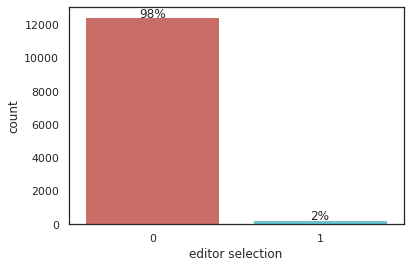

In [ ]:
import seaborn as sns
sns.set(style="white")
graph = sns.countplot(x = opinion['editor selection'], data = opinion,palette="hls")
i = 0
for p in graph.patches:
  height = p.get_height()  
  graph.text(p.get_x()+p.get_width()/2., height + 0.1,
         '{0:.0%}'.format((opinion['editor selection'].value_counts()[i])/12710),ha="center")
  i += 1
plt.figure
plt.savefig('label.eps', bbox_inches='tight')
files.download("label.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

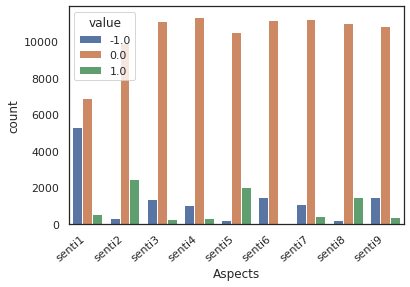

In [ ]:
graph2 = sns.countplot(x="variable", hue="value", data=pd.melt(X))
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Aspects')
plt.figure
plt.savefig('features.eps', bbox_inches='tight')
files.download("features.eps")

In [ ]:
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

In [ ]:
Counter(y)

Counter({0: 12456, 1: 12534})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=11,stratify=y)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
forest1 = RandomForestClassifier(oob_score = True, n_jobs = -1)

In [ ]:
clf1 = LogisticRegression(random_state=0)

In [ ]:
scores1 = cross_val_score(forest1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
scores2 = cross_val_score(clf1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
from numpy import mean, std

In [ ]:
print('Performce of Random Forest: %.3f' % (mean(scores1)))

Performce of Random Forest: 0.700


In [ ]:
print('Performance of Logistic Regraression: %.3f' % (mean(scores2)))

Performance of Logistic Regraression: 0.580


In [ ]:
y_test_pred1 = forest1.fit(X_train,y_train).predict(X_test)
y_test_pred2 = clf1.fit(X_train,y_train).predict(X_test)

In [ ]:
print("Accuracy of test - Random Forest:",metrics.accuracy_score(y_test, y_test_pred1))
print("Accuracy of test - Logistic Regression:",metrics.accuracy_score(y_test, y_test_pred2))

Accuracy of test - Random Forest: 0.6888755502200881
Accuracy of test - Logistic Regression: 0.5630252100840336


In [ ]:
target_names = ["0","1"]
print(classification_report(y_test, y_test_pred1, target_names=target_names))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72      4982
           1       0.76      0.56      0.64      5014

    accuracy                           0.69      9996
   macro avg       0.70      0.69      0.68      9996
weighted avg       0.70      0.69      0.68      9996



In [ ]:
print(classification_report(y_test, y_test_pred2, target_names=target_names))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      4982
           1       0.56      0.61      0.59      5014

    accuracy                           0.56      9996
   macro avg       0.56      0.56      0.56      9996
weighted avg       0.56      0.56      0.56      9996



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

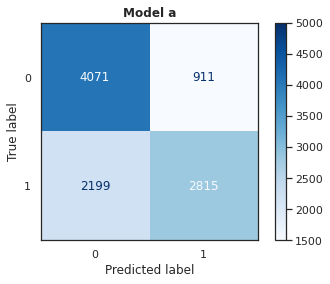

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
cm1 = plot_confusion_matrix(forest1, X_test, y_test, display_labels = ['0','1'], cmap=plt.cm.Blues, values_format = "d")
plt.title("Model a",fontweight="bold")
cm1.ax_.get_images()[0].set_clim(1500, 5000)
plt.figure
plt.savefig('fig1.eps', bbox_inches='tight')
files.download("fig1.eps")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

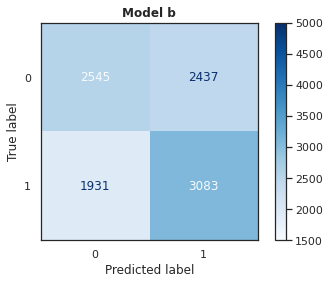

In [ ]:
cm2 = plot_confusion_matrix(clf1, X_test, y_test, display_labels = ['0','1'], cmap=plt.cm.Blues, values_format = "d")
plt.title("Model b",fontweight="bold")
cm2.ax_.get_images()[0].set_clim(1500, 5000)
plt.figure
plt.savefig('fig2.eps', bbox_inches='tight')
files.download("fig2.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

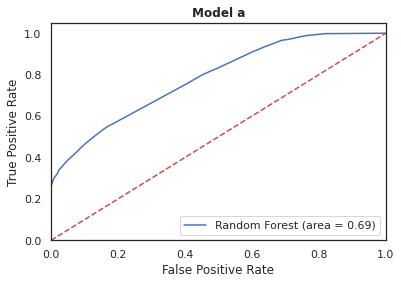

In [ ]:
forest_roc_auc = roc_auc_score(y_test, forest1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, forest1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Model a",fontweight="bold")
plt.legend(loc="lower right")
plt.figure
plt.savefig('fig3.eps', bbox_inches='tight')
files.download("fig3.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

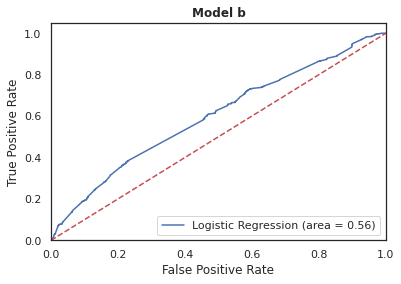

In [ ]:
logit_roc_auc = roc_auc_score(y_test, clf1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Model b",fontweight="bold")
plt.legend(loc="lower right")
plt.figure
plt.savefig('fig4.eps', bbox_inches='tight')
files.download("fig4.eps")